In [3]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
import spacy
import pymorphy2
from tqdm import tqdm

from collections import defaultdict
import gensim

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import seaborn as sns

import torch
from transformers import AutoTokenizer, AutoModel

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Dataset.csv')
df.head()    

,question_text,answer_text
0,Добрый день! Мы бы хотели пройти бесплатное о...,Здравствуйте! Регистрируйтесь на сайте https:/...
1,Добрый день.Помогите пожалуйста пройти регистр...,Добрый вечер!В системе на Вашу почту зарегистр...
2,Здравствуйте. Начала изучать курс для учителя ...,Здравствуйте! Возможно Ваша презентация имеет ...
3,"13 лет,интересует стоимость",Здравствуйте! Курс бесплатный -- можете регист...
4,"Здравствуйте, подскажите, пожалуйста, я прошёл...","Здравствуйте! Сертификат придет Вам на почту, ..."


In [5]:
stop_words = stopwords.words('russian')
nlp = spacy.load('ru_core_news_md')
morph = pymorphy2.MorphAnalyzer()

helper function

In [6]:
# Write a string to a file
def write_str(file_name, out):
    with open (file_name, 'w', encoding='utf-8') as f:
        f.write(out)
        
# Read the list of file lines
def read_list(file_name):
    with open (file_name, 'r', encoding='utf-8') as f:
        line = f.read()   
    return line.split('\n') 

def write_A9(file_name, A, index):
    out = '\n'.join(A[index])
    write_str(file_name, out)


def write_QA(file_name, Q, A):
    out = ''
    for i in range(len(Q)):
        out += str(i) + '\n' + Q[i] + '\n' + A[i] + '\n\n'
    write_str(file_name, out)        
        
# Read the list from the file
def read_id(file_name):
    xx = read_list(file_name)
    return [int(x) for x in xx if x != '']    

# Write the list to a file
def write_id(file_name, list_A5): 
    with open(file_name, 'w') as f:        
        for item in list_A5:
            f.write(f'{item}\n')       
           

In [7]:
Q0 = df['question_text'].values.tolist()
A0 = df['answer_text'].values.tolist()
write_QA('QA0.txt', Q0, A0)

STOP = ['Здравствуйте', 'Добрый день', 'Добрый вечер']
def remove(tt, type='A'):
    tt = [re.sub(r"\s+", ' ', sent) for sent in tt]    
    for s in STOP:
        tt = [re.sub(s + r"[\.,\!]", ' ', sent) for sent in tt]
    # email
    tt = [re.sub(r'\S*@\S*\s?', '', sent) for sent in tt]
    # '
    tt = [re.sub(r"\'", "", sent) for sent in tt]
    if type == 'Q':
        tt = [re.sub(r'\-\- Отправлено.+$', '', sent) for sent in tt]
    tt = [re.sub(r"\s+", ' ', sent) for sent in tt]
    return tt

    
Q1 = remove(Q0, type='Q')    
A1 = remove(A0)

write_QA('QA1.txt', Q1, A1)

In [8]:
w = 'можете'
p = morph.parse(w)[0]
p

Parse(word='можете', tag=OpencorporaTag('VERB,impf,intr plur,2per,pres,indc'), normal_form='мочь', score=1.0, methods_stack=((DictionaryAnalyzer(), 'можете', 2061, 4),))

In [9]:
print(len(A1))

4744


Define the signs of short strings

In [10]:
# Index of responses of length no more than n
def id_len(n=30):
    id = []
    for i in range(N):
        a = A1[i]
        if len(a) < n:
            id += [i]
    return id

# Index of questions of length no more than n
def id_qlen(n=30):
    id = []
    for i in range(N):
        q = Q1[i]
        if len(q) < n:
            id += [i]
    return id

# List of response lengths by id index
def len_id(id):
    nn = []
    for i in id:
        a = A1[i]
        nn += [len(a)]
    return nn

# List of question lengths by id index
def qlen_id(id):
    nn = []
    for i in id:
        q = Q1[i]
        nn += [len(q)]
    return nn

In [13]:
print(len(A1))
N = len(A1)

4744


number of short length questions 10 = 126


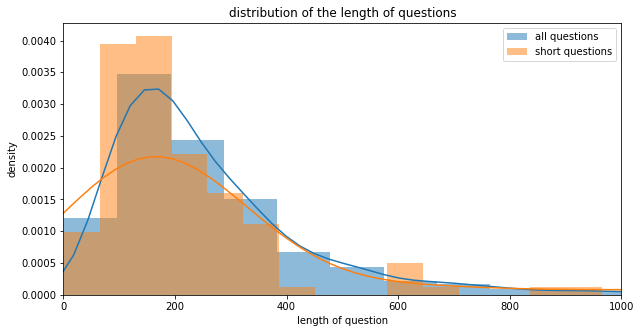

number of short length questions 20 = 401


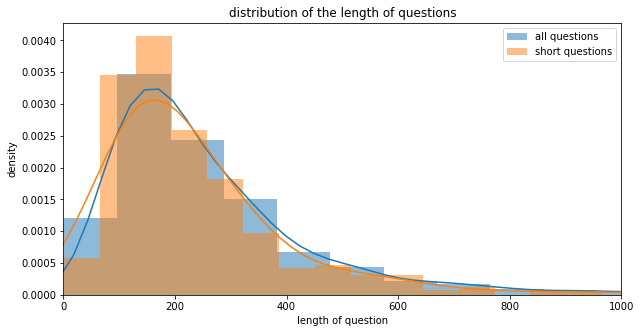

number of short length questions 30 = 633


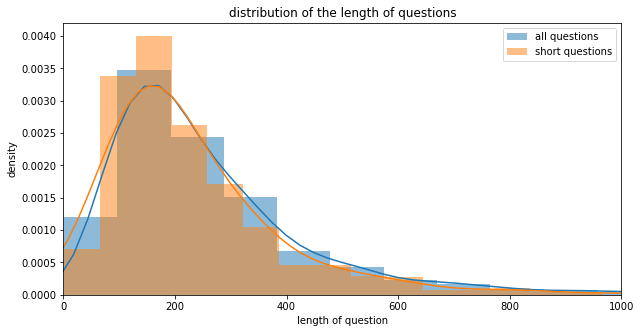

number of short length questions 40 = 954


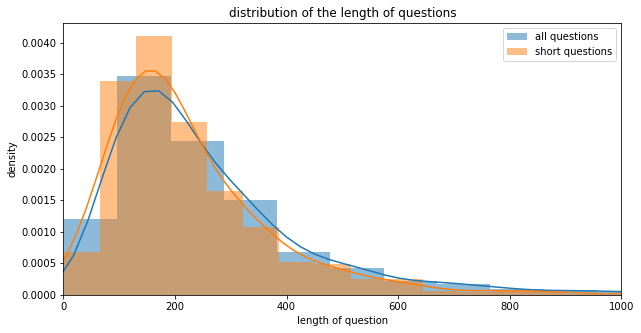

In [15]:
for i,na in enumerate(range(10,41)):
    id9 = id_len(na)

    # Determine the length of questions for short answers
    nn = qlen_id(id9)
    # Determine the length of the questions
    nn0 = qlen_id(list(range(N)))
    
    if i % 10 == 0:
        print(f'number of short length questions {na} = {len(id9)}')
        plt.xlim(0,1000)    
        sns.distplot(nn0, label='all questions', hist_kws=dict(alpha=0.5));
        sns.distplot(nn, label='short questions', hist_kws=dict(alpha=0.5));
        plt.title('distribution of the length of questions')
        plt.xlabel('length of question')
        plt.ylabel('density');
        plt.legend()
        plt.show();

Determine the average length of the question for an answer of length NA

10 266.3492063492063
11 252.53246753246754
12 249.66265060240963
13 249.76842105263157
14 249.56696428571428
15 247.76771653543307
16 246.31428571428572
17 249.51612903225808
18 249.87714285714284
19 246.77572559366754
20 247.3790523690773
21 247.06682577565633
22 248.73076923076923
23 244.83010752688173
24 244.87704918032787
25 243.626953125
26 243.79277566539923
27 242.8882783882784
28 244.60137457044672
29 245.85106382978722
30 244.9605055292259
31 242.99850746268658
32 242.1219512195122
33 240.81036834924967
34 239.70472440944883
35 239.28247162673392
36 238.8618181818182
37 238.41656942823803
38 236.9650507328072
39 235.95108695652175
40 235.97379454926624


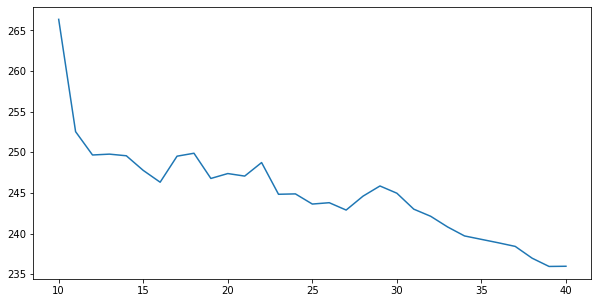

In [16]:
nn = []
mm = []
for na in range(10,41):
    id9 = id_len(na)
    m = 0
    for i in id9:
        m += len(Q1[i])
    m /= len(id9)
    print(na, m)
    nn += [na]
    mm += [m]
plt.plot(nn, mm);

In [17]:
id9 = id_len(40)
Q11 = np.array(Q1)
A11 = np.array(A1)
write_A9('Q9.txt', Q11, id9)
write_A9('A9.txt', A11, id9)